# Weight Initialization

Having good initial weights can place the neural network close to the optimal solution. This allows the neural network to come to the best solution quicker.

### Dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import helper
from tensorflow.examples.tutorials.mnist import input_data

print('getting MNIST dataset...')
mnist = input_data.read_data_sets("MNIST_data/" , one_hot = True)
print('Data Extracted')

getting MNIST dataset...
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as off

### Neural Network Architecture

In [2]:
layer_1_weight_shape = (mnist.train.images.shape[1], 256)
layer_2_weight_shape = (256 , 128)
layer_3_weight_shape = (128 , mnist.train.labels.shape[1])

## Initializing Weights Comparision

### All Zeros , Ones or Constant

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



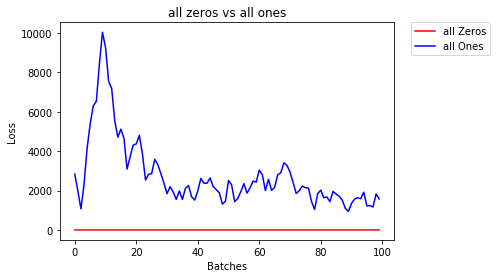

After 858 Batches (2 Epochs):
Validation Accuracy
   11.260% -- all Zeros
    9.240% -- all Ones
Loss
    2.305  -- all Zeros
  243.657  -- all Ones


In [3]:
all_zero_weights = [
    tf.Variable(tf.zeros(layer_1_weight_shape)),
    tf.Variable(tf.zeros(layer_2_weight_shape)),
    tf.Variable(tf.zeros(layer_3_weight_shape))
]

all_one_weights = [
    tf.Variable(tf.ones(layer_1_weight_shape)),
    tf.Variable(tf.ones(layer_2_weight_shape)),
    tf.Variable(tf.ones(layer_3_weight_shape))
]

helper.compare_init_weights(mnist , "all zeros vs all ones" , [(all_zero_weights , 'all Zeros') , (all_one_weights , 'all Ones')])

### Uniform Distribution

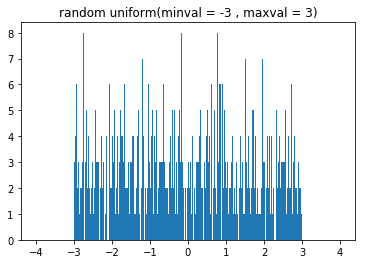

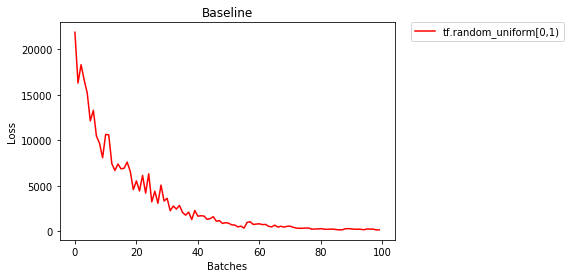

After 858 Batches (2 Epochs):
Validation Accuracy
   83.680% -- tf.random_uniform[0,1)
Loss
    9.999  -- tf.random_uniform[0,1)


In [4]:
helper.hist_dist('random uniform(minval = -3 , maxval = 3)' , tf.random_uniform([1000] , -3 , 3))

baseline_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape))
]

helper.compare_init_weights(mnist , 'Baseline' , [(baseline_weights , 'tf.random_uniform[0,1)')])

### General Rule

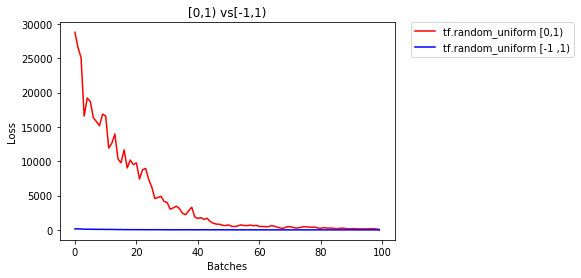

After 858 Batches (2 Epochs):
Validation Accuracy
   75.800% -- tf.random_uniform [0,1)
   90.060% -- tf.random_uniform [-1 ,1)
Loss
   16.232  -- tf.random_uniform [0,1)
    6.389  -- tf.random_uniform [-1 ,1)


In [5]:
uniform_neg1to1_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape , -1 , 1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape , -1 , 1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape , -1 , 1))
]

helper.compare_init_weights(mnist , '[0,1) vs[-1,1)', [(baseline_weights , 'tf.random_uniform [0,1)') , (uniform_neg1to1_weights , 'tf.random_uniform [-1 ,1)')])

### Too Small

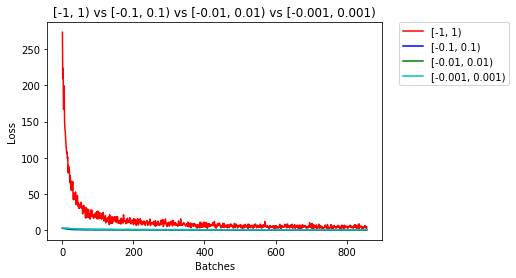

After 858 Batches (2 Epochs):
Validation Accuracy
   90.180% -- [-1, 1)
   97.280% -- [-0.1, 0.1)
   95.400% -- [-0.01, 0.01)
   94.220% -- [-0.001, 0.001)
Loss
    3.996  -- [-1, 1)
    0.186  -- [-0.1, 0.1)
    0.095  -- [-0.01, 0.01)
    0.316  -- [-0.001, 0.001)


In [7]:
uniform_neg01to01_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape , -0.1 , 0.1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape , -0.1 , 0.1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape , -0.1 , 0.1))
]

uniform_neg001to001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape , -0.01 , 0.01)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape , -0.01 , 0.01)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape , -0.01 , 0.01))
]

uniform_neg0001to0001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape , -0.001 , 0.001)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape , -0.001 , 0.001)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape , -0.001 , 0.001))
]

helper.compare_init_weights( mnist , '[-1, 1) vs [-0.1, 0.1) vs [-0.01, 0.01) vs [-0.001, 0.001)',
    [
        (uniform_neg1to1_weights, '[-1, 1)'),
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (uniform_neg001to001_weights, '[-0.01, 0.01)'),
        (uniform_neg0001to0001_weights, '[-0.001, 0.001)')] , plot_n_batches=None)

### Comparing [-0.1 , 0.1) vs General Rule

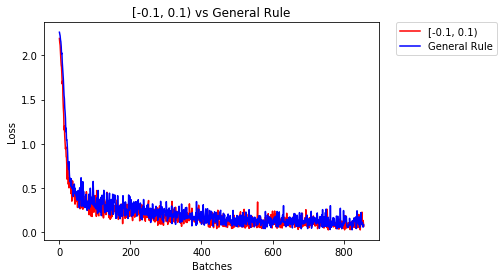

After 858 Batches (2 Epochs):
Validation Accuracy
   97.260% -- [-0.1, 0.1)
   96.960% -- General Rule
Loss
    0.069  -- [-0.1, 0.1)
    0.084  -- General Rule


In [9]:
import numpy as np

general_rule_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1/np.sqrt(layer_1_weight_shape[0]), 1/np.sqrt(layer_1_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1/np.sqrt(layer_2_weight_shape[0]), 1/np.sqrt(layer_2_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1/np.sqrt(layer_3_weight_shape[0]), 1/np.sqrt(layer_3_weight_shape[0])))
]

helper.compare_init_weights(
    mnist,
    '[-0.1, 0.1) vs General Rule',
    [
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (general_rule_weights, 'General Rule')],
    plot_n_batches=None)

### Normal Distribution

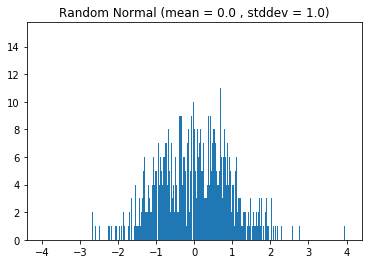

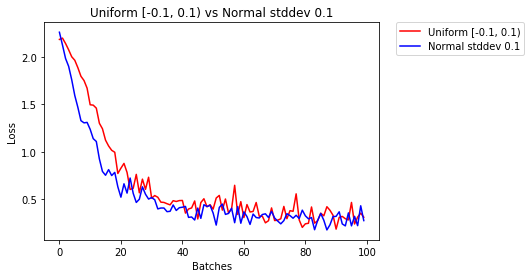

After 858 Batches (2 Epochs):
Validation Accuracy
   96.640% -- Uniform [-0.1, 0.1)
   96.900% -- Normal stddev 0.1
Loss
    0.228  -- Uniform [-0.1, 0.1)
    0.070  -- Normal stddev 0.1


In [10]:
helper.hist_dist('Random Normal (mean = 0.0 , stddev = 1.0)' , tf.random_normal([1000]))

normal_01_weights = [
    tf.Variable(tf.random_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Uniform [-0.1, 0.1) vs Normal stddev 0.1',
    [
        (uniform_neg01to01_weights, 'Uniform [-0.1, 0.1)'),
        (normal_01_weights, 'Normal stddev 0.1')])

### Truncated Normal Distribution

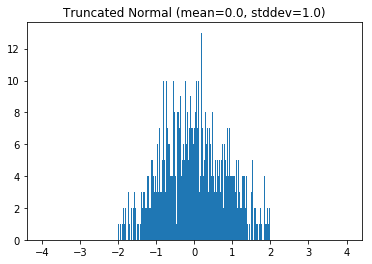

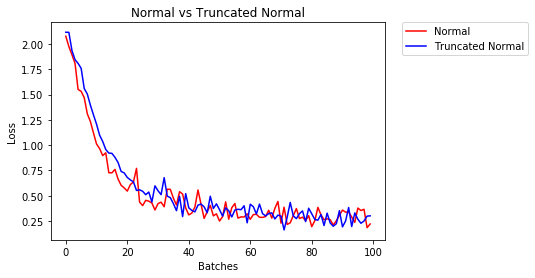

After 858 Batches (2 Epochs):
Validation Accuracy
   97.380% -- Normal
   97.260% -- Truncated Normal
Loss
    0.072  -- Normal
    0.052  -- Truncated Normal


In [11]:
helper.hist_dist('Truncated Normal (mean=0.0, stddev=1.0)', tf.truncated_normal([1000]))

trunc_normal_01_weights = [
    tf.Variable(tf.truncated_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Normal vs Truncated Normal',
    [
        (normal_01_weights, 'Normal'),
        (trunc_normal_01_weights, 'Truncated Normal')])